In [1532]:
import numpy as np
import math
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [1533]:
def readExcelSheet1(excelfile):
    from pandas import read_excel
    return (read_excel(excelfile)).values

In [1534]:
def readExcelRange(excelfile,sheetname="Sheet1",startrow=1,endrow=1,startcol=1,endcol=1):
    from pandas import read_excel
    values=(read_excel(excelfile, sheetname,header=None)).values;
    return values[startrow-1:endrow,startcol-1:endcol]

In [1535]:
def readExcel(excelfile,**args):
    if args:
        data=readExcelRange(excelfile,**args)
    else:
        data=readExcelSheet1(excelfile)
    if data.shape==(1,1):
        return data[0,0]
    elif (data.shape)[0]==1:
        return data[0]
    else:
        return data

In [1536]:
def writeExcelData(x,excelfile,sheetname,startrow,startcol):
    from pandas import DataFrame, ExcelWriter
    from openpyxl import load_workbook
    df=DataFrame(x)
    book = load_workbook(excelfile)
    writer = ExcelWriter(excelfile, engine='openpyxl') 
    writer.book = book
    writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
    df.to_excel(writer, sheet_name=sheetname,startrow=startrow-1, startcol=startcol-1, header=False, index=False)
    writer.save()
    writer.close()

In [1537]:
def getSheetNames(excelfile):
    from pandas import ExcelFile
    return (ExcelFile(excelfile)).sheet_names

In [1538]:
def map_labels(c,LabelC,LabelF,LabelM):
    if c == LabelC:
        return 'C'
    if c ==LabelF:
        return 'F'
    if c==LabelM:
        return 'M'
    

In [1539]:
excelfile=r"/Users/gholami/Documents/ucsc machine learning/assignment 5/Assignment_5_Data_and_Template.xlsx";
excelfile_c=r"/Users/gholami/Documents/ucsc machine learning/assignment 5/Assignment_5_Data_and_Template copy.xlsx";

Prepare Data

In [1540]:
sheets=getSheetNames(excelfile);sheets

[u'Data', u'Results']

In [1541]:
data=readExcel(excelfile)
print data.shape
X = np.array(data[:,:2],dtype=float);
print X

(950, 2)
[[ 57.75  13.  ]
 [ 73.    23.5 ]
 [ 75.    23.5 ]
 ..., 
 [ 59.5   15.  ]
 [ 65.25  14.5 ]
 [ 74.    19.5 ]]


In [1542]:
from sklearn.mixture import GaussianMixture
#n_components=3
gmm = GaussianMixture(n_components=3,covariance_type='full',tol=1e-3,reg_covar=1e-06,
                      max_iter=100,n_init=5,init_params='kmeans', weights_init=None, 
                      means_init=None, precisions_init=None, random_state=None,warm_start=False, 
                      verbose=0, verbose_interval=1).fit(X)
# tol=1e-3,reg_covar=1e-06,
labels = gmm.predict(X)
probs = gmm.predict_proba(X)
probs_max = probs.max(1)*100.0
print ("#of iterations=",gmm.n_iter_)
#print (gmm.means_,gmm.means_.shape, gmm.weights_)
LabelC=np.argmin(gmm.means_[:,0],axis=0)
LabelM=np.argmax(gmm.means_[:,0],axis=0)
IndF= (gmm.means_[:,0] > gmm.means_.min(0)[0]) & (gmm.means_[:,0] < gmm.means_.max(0)[0])
#LabelF =((n_components)*(n_components-1))/2 - (LabelC+LabelM)
Labels= [i for i, x in enumerate(IndF) if x == True]
LabelF=Labels[0]
print (LabelC,LabelF,LabelM)

('#of iterations=', 5)
(0, 2, 1)


In [1543]:
final_labels = [map_labels(l,LabelC,LabelF,LabelM) for l in labels];
print(final_labels[0:5])

['C', 'M', 'M', 'M', 'C']


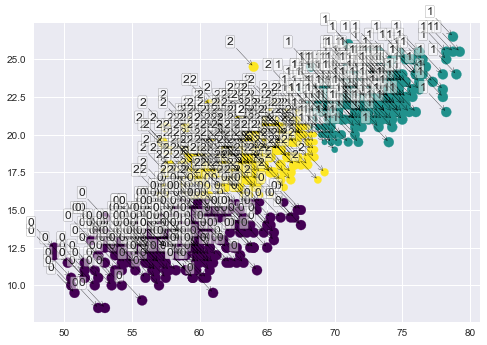

In [1544]:
#plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');
size = 100 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);
for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.1', fc='White', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.show()

In [1545]:
from collections import Counter
counter = Counter(final_labels)
print(counter)

Counter({'F': 411, 'C': 285, 'M': 254})


In [ ]:
writeExcelData(final_labels,excelfile_c,'Results',2,1)
writeExcelData(probs_max,excelfile_c,'Results',2,2)
writeExcelData([counter.get('M')],excelfile_c,'Results',2,6)
writeExcelData([counter.get('F')],excelfile_c,'Results',3,6)
writeExcelData([counter.get('C')],excelfile_c,'Results',4,6)